Brian Phelan

*15 February 2018*

**HW5**

# Problem 4:

Part 3:

In [1]:
import sympy as sp               
import numpy as np               
import matplotlib.pyplot as plt  
from __future__ import division

In [2]:
R = 1e2 #Ohms
L = 1e-2 #Henry's
w = 10

freq = np.arange(0,40000,100)
response = np.sqrt((R**4) + (L**2)*(R**2)*(freq**2))/(R**2 + (L**2)*freq**2)

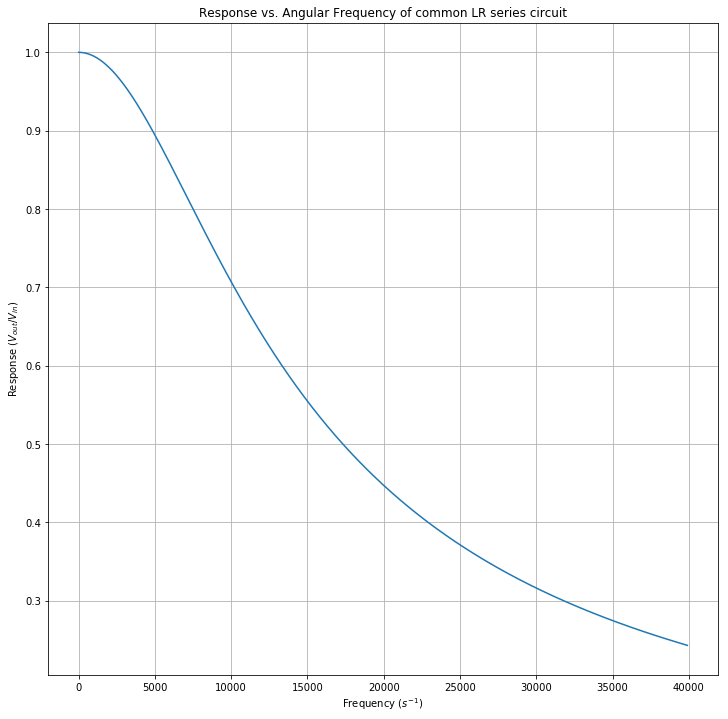

In [3]:
plt.figure(figsize=(12,12))
plt.plot(freq,response)
plt.xlabel('Frequency ($s^{-1}$)')
plt.ylabel('Response (${V_{out}}/{V_{in}}$)')
plt.title('Response vs. Angular Frequency of common LR series circuit')
plt.grid()
plt.show()

We can see that this circuit is indeed a low-pass filter because the response decreases as frequency increases.

Part 4:

In [11]:
time = np.arange(0, 10, 0.01)
V_in = []
V_out = []

for t in range(len(time)):
    V_inst = 0
    for i in range(1000):
        V_inst += (4/np.pi)*(np.sin((2*(i+1)-1)*w*time[t]))/(2*(i+1)-1)
    V_in.append(V_inst)
    
phi = 0.1

for t in range(len(time)):
    V_inst = 0
    for i in range(1000):
        V_inst += (4/np.pi)*(np.sin((2*(i+1)-1)*w*time[t]+0.1))/(2*(i+1)-1)
    V_out.append(V_inst)

for i in range(len(V_out)):
    V_out[i] *= np.sqrt(R**4+(w**2)*(L**2)*(R**2))/(R**2+(w**2)*(L**2))

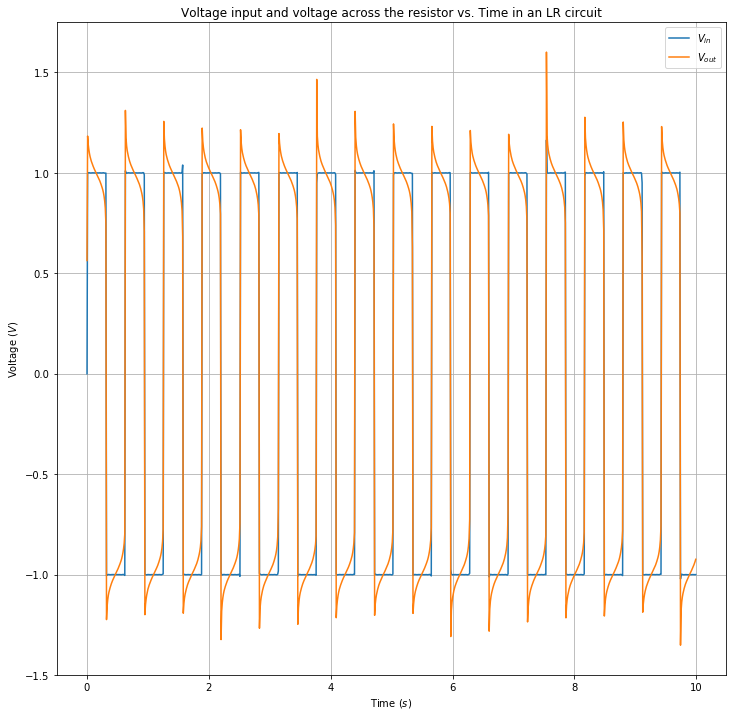

In [14]:
plt.figure(figsize=(12,12))
plt.plot(time,V_in,label='$V_{in}$')
plt.plot(time,V_out,label='$V_{out}$')
plt.xlabel('Time ($s$)')
plt.ylabel('Voltage ($V$)')
plt.title('Voltage input and voltage across the resistor vs. Time in an LR circuit')
plt.grid()
plt.legend()
plt.show()

I am having a hard time determining if this is correct. $V_{in}$ is correct because it is just a square wave. But I am not fully convinced that $V_{out}$ is correct. I took the output series and added a phase shift to each sine function in the output. This made sense to me because if the output is shifted by some phase phi, then each sine function in the series should also be shifted by a phase phi. But then again, maybe this is correct. The inductor should allow for some sort of delay in the signal and in the response which looks like what I'm seeing here.

# Problem 5:

*I plan on including my work from last week. I turned it in to Github late so I didn't get feedback. That's fine but hopefully you can read through my work this week and last week so I can get feedback on both.*

The physical origins of ferromagnetism and antiferromagnetism are very interesting when viewed through a quantum mechanical lens. The phenomena of ferromagnetism and antiferromagnetism are manifestations of ordered spins in a lattice of atoms. For simplicity, it may be easiest to read this paper in the context of a 2D square lattice of atoms. This is one of the most simple configurations one can imagine for a lattice of atoms. In ferromagnetic materials, the spins of the constituent atoms "spontaneously" align such that they all point in the same direction i.e. they are parallel. This alignment of magentic moments usually occurs within specific magnetic domains of the atom. Within these domains, the spins of the constituent atoms align in ferromagnetic materials. At very low temperatures, or in the presence of an external magnetic field, the moments of these domains will align as well. These distance scales of these domains are large enough such that the boundries of domains can sometimes be determined by observing the material through a microscope. Antiferromagnetism is pretty much what it sounds like. The spins of the consituent atoms in the material become anti-aligned i.e. antiparallel. We can imagine, for a 2D square lattice, this means that if the lattice point of interest has spin $m_s = +\frac{1}{2}$, the four nearest neighbors of that lattice site will all have spins $m_s = -\frac{1}{2}$. Again, this antialignment throughout the bulk of the material is only possible at very low temperatures. Above a certain temperture, antiferromagnetic materials are usually paramagnetic which means the spins of the lattice sites will align themselves antiparallel to an applied magnetic field.

Although we can possibly discuss the effects (and very crudely, the possible causes) of these types of magetism in a classical sense, it can be much more helpful to discuss these phenomena in terms of quantum mechanics. One very famous theory of spin interactions in a lattice of atoms is the Heisenberg model. Without delving into the complete derivation of this model, it will suffice to solely mention and breifly explain the hamiltonian of this model:

$H = \frac{1}{2}\sum_{i,j} J_{ij}(S_{i}*S_{j})$

Surprisingly, this hamiltonian is fairly simple. The hamiltonian is the sum of the nearest neighbor spin interactions which is represented by the dot product of the spins of nearest neighbor atoms: $(S_{i}*S_{j})$. The coefficients that multiply this spin interaction are coefficients that determine the nature of the interaction. For non-nearest neighbors, $J_{ij} = 0$. For nearest neighbors, we can have: $J_{ij} > 0, J_{ij} < 0$, which represent antiferromagnetism and ferromagnetism respectively. Trying to understand this hamiltonian and use it as is would not allow us to derive the specific situations of magnetism. We have to give this hamiltonian context or make some assumptions that would allow us to determine the coefficients. We can do this by using similar models in conjunction with the Heisenberg model to derive specific magnetic situations. This is the route that I plan to take in order to explain antiferromagnetism.

We will use the Hubbard model to hopefully derive a form of the Heisenberg hamiltonian that is specific to the antiferromagnetic case. The Hubbard model makes an assumption about the lattice: each lattice site can only support one state (which means each lattice site can only contain a maximum of two electrons) and the Pauli principle asserts that if two electrons occupy the same lattice point, their spin orientations must be opposite. The hamiltonian of the Hubbard model consists of two terms: $H = H_0 + H_1$. The first term, $H_0$, is a term that represents the Coulomb repulsion of electrons that occupy the same lattice point. The second term, $H_1$, is a term that represents the kinetic energy of electrons that "hop" from site to site. Next, we assume that the lattice as a whole is in its ground state configuration. In this ground state, the "hopping" term allows for a superposition of electrons on any given lattice point. We can think of this "hopping" as a sea of electrons that have some probability distribution of their location. Because of this superposition, the Coulomb term of the Hubbard hamiltonian is huge. Conversely, we can consider the Coulomb term which prefers one or fewer electrons per site as to reduce the Coulomb repulsion betweeen electrons. We see now that each term in the ground state is in competition to lower the overall energy of the system. Therefore, we will have to treat the Hamiltonian as just the $H_0$ (Coulomb) term and the "hopping" term will be treated as a perturbation. This $H_0$ term looks like:

$H_0 = \frac{1}{2}I\sum_{i\sigma} n_{i\sigma}n_{i-\sigma}$

This term is proportional to the electrostatic energy, $I$. The $n$'s count the number of sites that have two electrons with opposite spin (the $\frac{1}{2}$ accounts for double counting). The eigenvalues for the $H_0$ term has eigenvalues of $nI$ which is the number of sites with two electrons times the electrostatic energy. In the ground state, when we apply a first order perturbation, we see that the first order perturbation term is zero unless the quantum number $n$ (different from the $n$ representing number of sites with two electrons) is equal to 1. Then we attempt to solve the second order perturbation in the ground state. I plan on writing out the derivation in my actual paper, but to be brief, I will only write down the result of this second order perturbation calculation:

$H_{eff} = P_0(\sum_{kl}^{'}|T_{kl}|^{2}(2S_l*S_k - \frac{1}{2})/I)P_0$

The $P_0$'s are operators that constrain the system to the subspace of states with quantum number $n = 0$. We can see that this hamiltonian looks just like the Heisenberg hamiltonian where $J_{ij} = |T_{kl}|^2$. Since $J_{ij} > 0$, we have just described the antiferromagnetic case using the Hubbard model to derive a form of the Heisenberg hamiltonian.

Now that we have described the antiferromagnetic case, describing the ferromagnetic case would be a natural next step. To describe the ferromagnetic case, we will not be needing the Hubbard model, only the Heisenberg model. To begin, there are a couple assumptions that we must make: the spin interactions in the lattice are the dominating interactions, the particles of interest are fermions, and the spin interactions are anisotropic. Now that we've laid out some of our assumptions, we can re-write the Heisenberg hamiltonian like:

$H = \frac{1}{2}\sum_{i,j} J_{ij}(S_{i}^{x}S_{j}^{x} + S_{i}^{y}S_{j}^{y} + S_{i}^{z}S_{j}^{z})$   (1)

We've labeled this equation, equation (1). In this equation, it can be shown that the $x$, $y$, or $z$ components of spin do not commute with eachother. Therefore, we define the total spin $S$ as:

$S = \sum_{i}S_i$

Defining the total spin this way, and using the fact that a single component of the total spin will commute with at least one component of the hamiltonian, it is possible to define a state that is an eigenstate of $H$, $S^2$, and $S_z$.  Now we consider the state in which all the spins are aligned which results in the maximum value for the total spin. The state is just the product of each individual electron state at its maximum spin value:

$|\psi> = |S_1,m_1>*|S_2,m_2>*|S_3,m_3>...$

Next we can act on this wavefunction with the hamiltonian (1) above. If we do this, we can rearrang the $x$ and $y$ spin dot products into raising and lowering operators for the spin quantum number $m_s$. The $z$ spin dot product is left unaltered. Once we do this operation, we will see that:

$H|\psi> = -\frac{1}{2}S^2\sum_{ij}J_{ij}|\psi>$

Remember, this is true for a state which has maximized spin for each state and each spin is aligned parallel with its nearest neighbor. Now considering a state $|\psi>$, not necessarily having maximum total spin, we can take the expectation value of $H$ with this state:

$<\psi|H|\psi> = -\frac{1}{2}\sum_{ij}J_{ij}(\frac{1}{2}<\psi|S_i^+S_j^-|\psi> + \frac{1}{2}<\psi|S_i^-S_j^+|\psi> + <\psi|S_i^zS_j^z|\psi>) =  -\frac{1}{2}\sum_{ij}J_{ij}m_im_j$

If $J_{ij} >= 0$ for all $i,j$, then $J_{ij}m_im_j <= J_{ij}S^2$. And since the states described are states with eigenvalues that are less than the maximum possible eigenvalues, $-\frac{1}{2}S^2\sum_{ij}J_{ij}$, and since we assumed that $J_{ij} >= 0$ (exchange interactions are positive), we have described the ground state of the Heisenberg model in the ferromagnetic case. (Note: I said earlier that if $J_{ij} > 0$ that this means we have antiferromagnetism but since there is a $"-"$ sign in this expectation value than we actually have $J_{ij} < 0$ which is the ferromagnetic case).

From a theoretical standpoint, these quantum models of ferromagnetisms and antiferromagnetism are interesting, but what deteremines if a certain material is ferromagnetic, antiferromagnetic, paramagnetic, diamagnetic, etc? One way we can determine the type of magnetism in a material is to measure the magnetic susceptibility of the material. This magnetic susceptibility, which will now be referred to as $\chi_m$, is a measure of the internal magnetic response of the material to an externally applied magnetic field. In paramagnetic materials, the internal magnetic field aligns itself in the direction of the externally applied magnetic field. In diamagnetic materials, the internal magnetic field aligns itself opposite the direction of the externally applied magnetic field.

In ferromagnetic materials, the magnetic susceptibility can be written as:

$\chi_m = \frac{C}{T-C\lambda/\mu_0}$

In this equation, $T$ is the temperature of the material, $\lambda$ is a constant that represents the strenght of the exchange interaction between electrons in the lattice, and the $C$ is the Curie constant given by: $C = \frac{N\mu_B^2\mu_0}{k_B}$, where $N$ is the number of magnetic particles per volume, $\mu_B$ is the Bohr magneton, $\mu_0$ is the vacuum permeability, and $k_B$ is the Boltzmann constant. We can see from this equation that as temperature of the material increases, the magentic susceptibility decreases. Classically this makes sense because as the temperature of the material increases, the atoms in the lattice have greater kinetic energy and therefore, are vibrating very rapidly in the solid. This rapid vibration makes it difficult for the spins of the electrons of an atom to align. To make an analogy, it is like you have a row of archers that are trying to hit a target. It is easy for them to hit the target if they are not moving around a lot. In this analogy, the archer's ability to hit the target is like the electrons ability to align their spins.

In antiferromagnetic materials, the magnetic susceptibility can be written as:

$\chi_m = \frac{C}{T+\theta_N}$

Again, in this equation, $C$ is the Curie constant, $T$ is the temperature of the material, and $\theta_N$ is the Neel temperature. Below this temperature, the susceptibility will depend on the orientation of the field to the crystal.

*References (not complete MLA citation, and not necessarily listed in order used):*

https://www.ucl.ac.uk/qsd/people/teaching/MPM-Part2

https://www.physik.tu-dresden.de/~timm/personal/teaching/thmag_w09/lecturenotes.pdf

http://materias.df.uba.ar/e2a2013c2/files/2012/07/From-Hubbard-to-Heis-AJP000044.pdf

http://folk.ntnu.no/johnof/magnetism-2012.pdf

https://en.wikipedia.org/wiki/Antiferromagnetism

https://en.wikipedia.org/wiki/Ferromagnetism